# Ames Housing Test File Preprocessing

This notebook is dedicated to cleaning and transforming the test csv file, mirroring the process done for the training dataset. This way, it can be put through the model that is fitted by the transformed training dataset.

In [724]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [725]:
ames_test = pd.read_csv('./datasets/test.csv')

In [726]:
ames_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [727]:
ames_test.shape

(878, 80)

In [728]:
ames_test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [729]:
# Dropping the following columns for the ames dataframe due to their perceived lack of weight/significance
# or having too many null values
                 
drop_features = ['Id', 'PID', 'Lot Frontage', 'Street', 'Alley', 'Lot Shape', 'House Style', 'Year Built', 'Roof Style', 
                 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Exposure', 
                 'BsmtFin Type 2', 'Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Heating', 'Electrical', 'Low Qual Fin SF', 
                 'Functional', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
                 'Fence', 'Misc Feature', 'Misc Val', 'Mo Sold', '1st Flr SF', '2nd Flr SF', 'Condition 2', 
                 'Kitchen AbvGr', 'Foundation', 'Yr Sold', '3Ssn Porch', 'Screen Porch', 'Enclosed Porch', 'Wood Deck SF',
                  'Lot Area', 'Year Remod/Add', 'Garage Qual', 'Garage Cond', 'Bsmt Cond', 'Exter Cond',
                 'Fireplace Qu', 'Central Air', 'Open Porch SF', 'Fireplaces', 'Pool QC', 'Pool Area']
           
ames_test = ames_test.drop(columns= drop_features)

In [730]:
ames_test.shape

(878, 27)

In [731]:
# Checking for null values
ames_test.isnull().sum()

MS SubClass        0
MS Zoning          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Bldg Type          0
Overall Qual       0
Overall Cond       0
Exter Qual         0
Bsmt Qual         25
BsmtFin Type 1    25
Total Bsmt SF      0
Heating QC         0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Garage Area        0
Paved Drive        0
Sale Type          0
dtype: int64

In [732]:
# Replacing NaaN values for the following columns with either the 'Na' characters or 0.0
ames_test['BsmtFin Type 1'] = ames_test['BsmtFin Type 1'].replace(np.nan, 'Na')
ames_test['Bsmt Qual'] = ames_test['Bsmt Qual'].replace(np.nan, 'Na')
ames_test['Total Bsmt SF'] = ames_test['Total Bsmt SF'].replace(np.nan, 0.0)
ames_test['Bsmt Full Bath'] = ames_test['Bsmt Full Bath'].replace(np.nan, 0.0)
ames_test['Bsmt Half Bath'] = ames_test['Bsmt Half Bath'].replace(np.nan, 0.0)
ames_test['Garage Area'] = ames_test['Garage Area'].replace(np.nan, 0.0)

In [733]:
ames_test.shape

(878, 27)

In [734]:
# No more null values
ames_test.isnull().sum()

MS SubClass       0
MS Zoning         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Bldg Type         0
Overall Qual      0
Overall Cond      0
Exter Qual        0
Bsmt Qual         0
BsmtFin Type 1    0
Total Bsmt SF     0
Heating QC        0
Gr Liv Area       0
Bsmt Full Bath    0
Bsmt Half Bath    0
Full Bath         0
Half Bath         0
Bedroom AbvGr     0
Kitchen Qual      0
TotRms AbvGrd     0
Garage Area       0
Paved Drive       0
Sale Type         0
dtype: int64

In [735]:
# Creating new columns that sum the total for bathrooms, beds/baths, living area, and porch area
# ames_train['tot_baths'] = ames_train['Bsmt Full Bath'] + ames_train['Full Bath'] + (ames_train['Half Bath']*0.5) + (ames_train['Bsmt Half Bath']*0.5)
ames_test['tot_baths'] = ames_test['Full Bath'] + (ames_test['Half Bath']*0.5)
ames_test.drop(columns=['Full Bath', 'Half Bath'], inplace=True)

ames_test['tot_bed_bath'] = ames_test['tot_baths'] + ames_test['Bedroom AbvGr']
ames_test['tot_liv_area'] = ames_test['Total Bsmt SF'] + ames_test['Gr Liv Area']

In [736]:
# Converting 'quality' category columns into ordinal number values 
# Some code taken in collaboration with Kovacs

qual_map = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, "NA":0}
qual_cols = ["Exter Qual", "Exter Cond", "Bsmt Qual", "Bsmt Cond", "Kitchen Qual", 
             "Fireplace Qu", "Garage Qual", "Garage Cond", "Pool QC"]

for i in ames_test.columns:
    if i in qual_cols:
        ames_test[i] = ames_test[i].map(qual_map)
        pd.to_numeric(arg=ames_test[i], errors="coerce")
    ames_test[i] = ames_test[i].replace(np.nan, 0.0)

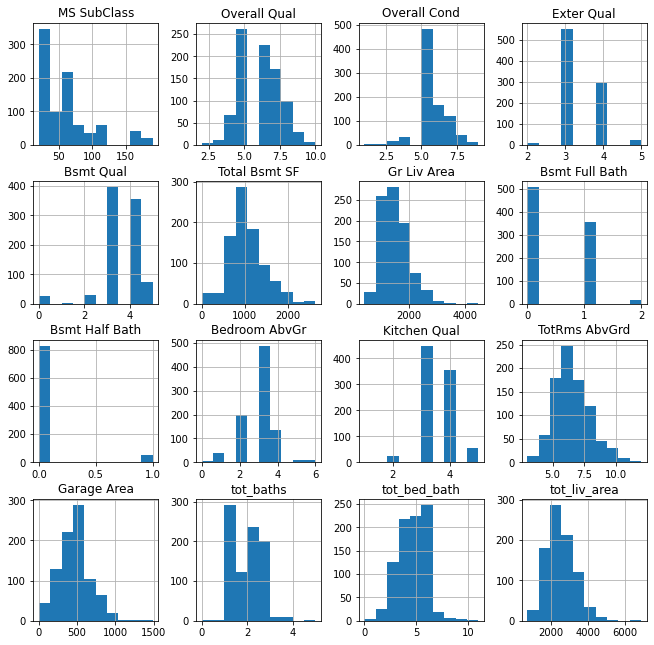

In [737]:
ames_test[ames_test.dtypes[(ames_test.dtypes=="float64")|(ames_test.dtypes=="int64")].index.values].hist(figsize=[11,11]);

In [738]:
# Condition 2 was dropped, so renaming Condition 1 to Condition
ames_test.rename(columns={'Condition 1': 'Condition'}, inplace=True)

In [741]:
# # Grouping condition values related to railroads and positives 
for i in range(len(ames_test['Condition'])):
    if ames_test['Condition'][i] == 'RRNn' or ames_test['Condition'][i] == 'RRNe':
        ames_test['Condition'][i] = 'RRN' 
    elif ames_test['Condition'][i] == 'RRAn' or ames_test['Condition'][i] == 'RRAe':
        ames_test['Condition'][i] = 'RRA'
    elif ames_test['Condition'][i] == 'Artery' or ames_test['Condition'][i] == 'Feedr':
        ames_test['Condition'][i] = 'Street'
    elif ames_test['Condition'][i] == 'PosN' or ames_test['Condition'][i] == 'PosA':
        ames_test['Condition'][i] = 'Pos'

In [740]:
ames_test.shape

(878, 28)

In [742]:
ames_test.drop(columns=['Bedroom AbvGr', 'Overall Cond'], inplace=True)

In [743]:
ames_test.to_csv('./datasets/test_cleaned_x_vars.csv')

### Applying Polynomial Features and Dummy Columns to Dataframe Subsets

In [744]:
# Creating a list of x variable columns with numerical values
num_vars_test = [col for col in ames_test._get_numeric_data().columns]
num_vars_test.remove('MS SubClass') # MS Subclass is type int, but still categorical

In [745]:
num_vars_test

['Overall Qual',
 'Exter Qual',
 'Bsmt Qual',
 'Total Bsmt SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Garage Area',
 'tot_baths',
 'tot_bed_bath',
 'tot_liv_area']

In [746]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [747]:
# Generating Polynomial Features on only the numerical variables

X_num_test = ames_test[num_vars_test]

poly_test = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transform numerical X variables.
X_overfit_test = poly_test.fit_transform(X_num_test)

In [748]:
# Turning X_overfit into dataframe type
X_overfit_test = pd.DataFrame(X_overfit_test)

In [749]:
X_overfit_test.shape

(878, 104)

In [750]:
# Making a dataframe for all categorical columns

ames_categ_test = ames_test.drop(columns=num_vars_test)

In [751]:
ames_categ_test.head()

,MS SubClass,MS Zoning,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition,Bldg Type,BsmtFin Type 1,Heating QC,Paved Drive,Sale Type
0,190,RM,Lvl,AllPub,Inside,Gtl,OldTown,Norm,2fmCon,Unf,Gd,Y,WD
1,90,RL,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Duplex,Unf,TA,Y,WD
2,60,RL,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,1Fam,GLQ,Ex,Y,New
3,30,RM,Lvl,AllPub,Inside,Gtl,OldTown,Norm,1Fam,Unf,TA,N,WD
4,20,RL,Lvl,AllPub,Inside,Gtl,NAmes,Norm,1Fam,BLQ,Gd,Y,WD


In [752]:
# Listing out all the ames_categ variables
dummy_list_test = [x for x in ames_categ_test.columns]

In [753]:
# Dummifying all categorical variables, including MS Subclass
ames_categ_test = pd.get_dummies(data=ames_categ_test, columns=dummy_list_test, drop_first=True)

In [754]:
ames_categ_test.shape

(878, 82)

In [755]:
X_overfit_test.shape

(878, 104)

In [756]:
# Combining my preprocessed numerical and categorical sub-datasets. Adding reset_index to prevent adding of more rows
X_complete_test = pd.concat([X_overfit_test, ames_categ_test.reset_index()], axis=1)

reset_index() code taken from this [page](https://stackoverflow.com/questions/50368145/pandas-concat-increases-number-of-rows)

In [757]:
X_complete_test.shape

(878, 187)

In [758]:
# X_complete_test.to_csv('./datasets/test_transformed_x_vars_2.csv')
X_complete_test.to_csv('./datasets/test_transformed_x_vars.csv')